# Solving the Taxi Problem using Q Learning

### Goal:

Say our agent is the driving the taxi. There are totally four locations and the agent has to
pick up a passenger at one location and drop at the another. The agent will receive +20
points as a reward for successful drop off and -1 point for every time step it takes. The agent
will also lose -10 points for illegal pickups and drops. So the goal of our agent is to learn to
pick up and drop passengers at the correct location in a short time without boarding any illegal
passengers.

 First, we import all necessary libraries and simulate the environment

In [1]:
import random
import matplotlib.pyplot as plt
import gym
env = gym.make('Taxi-v3')

 The environment is shown below, where the letters (R, G, Y, B) represents the different
locations and a tiny yellow colored rectangle is the taxi driving by our agent.

In [2]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+





Now, we initialize, Q table as a dictionary which stores state-action pair specifying value of performing an action a in
 state s.

In [3]:
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0


We define a function called update_q_table which will update the Q values according to our Q learning update rule. 

If you look at the below function, we take the value which has maximum value for a state-action pair and store it in a variable called qa, then we update the Q value of the preivous state by our update rule.

In [4]:
def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    
    qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
    q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])


    
Then, we define a function for performing epsilon-greedy policy. In epsilon-greedy policy, either we select best action with probability 1-epsilon or we explore new action with probability epsilon. 

In [5]:
def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])


Now we initialize necessary variables

alpha - TD learning rate

gamma - discount factor <br>
epsilon - epsilon value in epsilon greedy policy

In [6]:
alpha = 0.4
gamma = 0.999
epsilon = 0.017

Now, Let us perform Q Learning!!!!

In [7]:
all_rewards = []

for i in range(8000):
    r = 0
    
    prev_state = env.reset()
    
    while True:
        # env.render()
        
        # In each state, we select the action by epsilon-greedy policy
        action = epsilon_greedy_policy(prev_state, epsilon)
        
        # then we perform the action and move to the next state, and receive the reward
        nextstate, reward, done, _ = env.step(action)
        
        # Next we update the Q value using our update_q_table function
        # which updates the Q value by Q learning update rule
        
        update_q_table(prev_state, action, reward, nextstate, alpha, gamma)
        
        # Finally we update the previous state as next state
        prev_state = nextstate

        # Store all the rewards obtained
        r += reward

        #we will break the loop, if we are at the terminal state of the episode
        if done:
            break

    # print("total reward: ", r)
    all_rewards.append(r)

env.close()

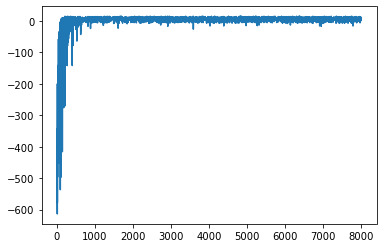

In [8]:
plt.plot(all_rewards)
plt.show()